In [13]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('whitegrid')


In [14]:
data = pd.read_csv("../00_data/vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
drop_row_index = data[data['Genre'] > 2015].index
data = data.drop(drop_row_index)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          0 non-null      int64  
 1   Name          0 non-null      object 
 2   Platform      0 non-null      object 
 3   Year          0 non-null      float64
 4   Genre         0 non-null      object 
 5   Publisher     0 non-null      object 
 6   NA_Sales      0 non-null      float64
 7   EU_Sales      0 non-null      float64
 8   JP_Sales      0 non-null      float64
 9   Other_Sales   0 non-null      float64
 10  Global_Sales  0 non-null      float64
dtypes: float64(6), int64(1), object(4)
memory usage: 132.0+ bytes


In [16]:
data['Genre'].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

### 장르 별 매출

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

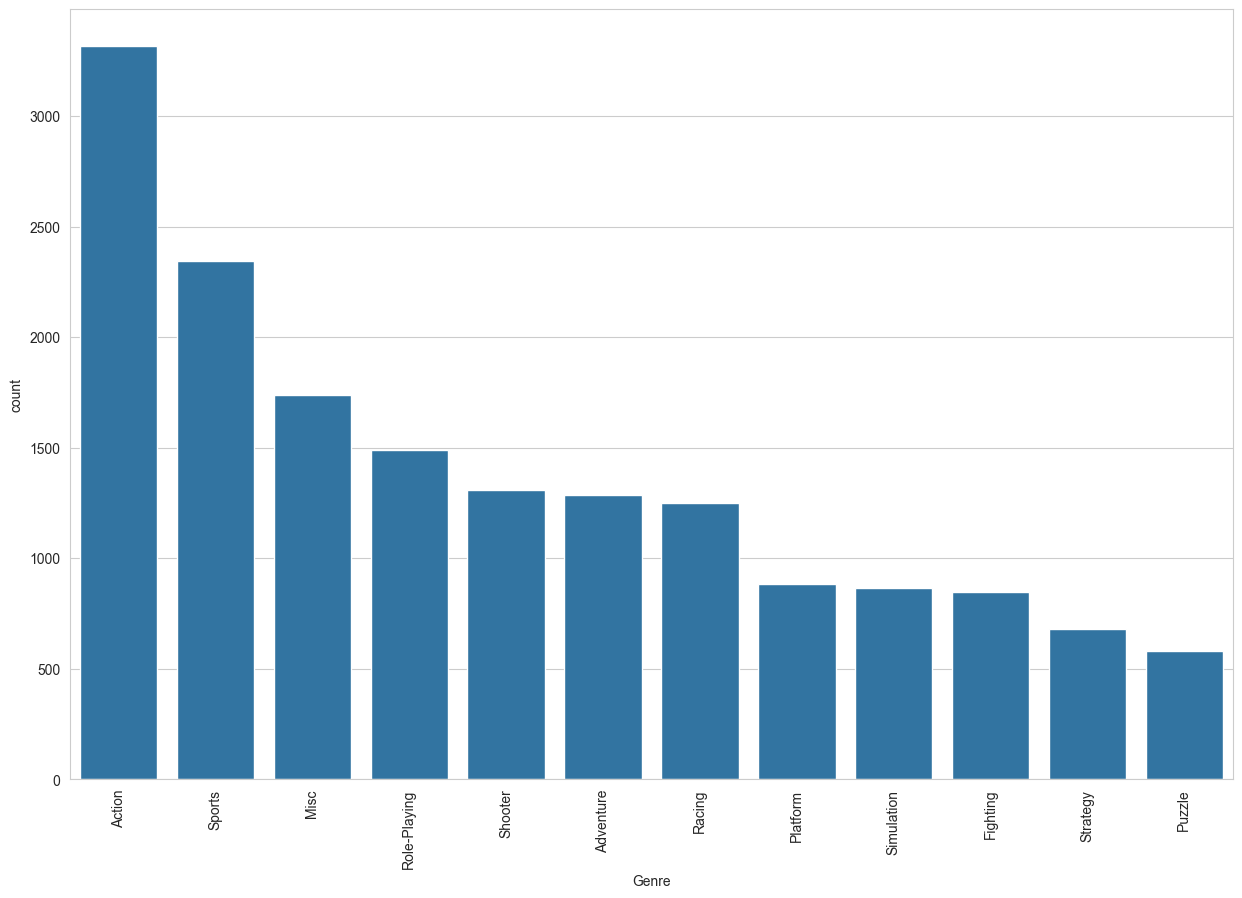

In [20]:
# 막대 그래프: 장르별 매출
plt.figure(figsize=(15,10))
sns.countplot(x="Genre", data=data, order=data['Genre'].value_counts().index)
plt.xticks(rotation=90)

### 총 매출 5위인 연도에 장르별 매출액

([0, 1, 2, 3, 4],
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

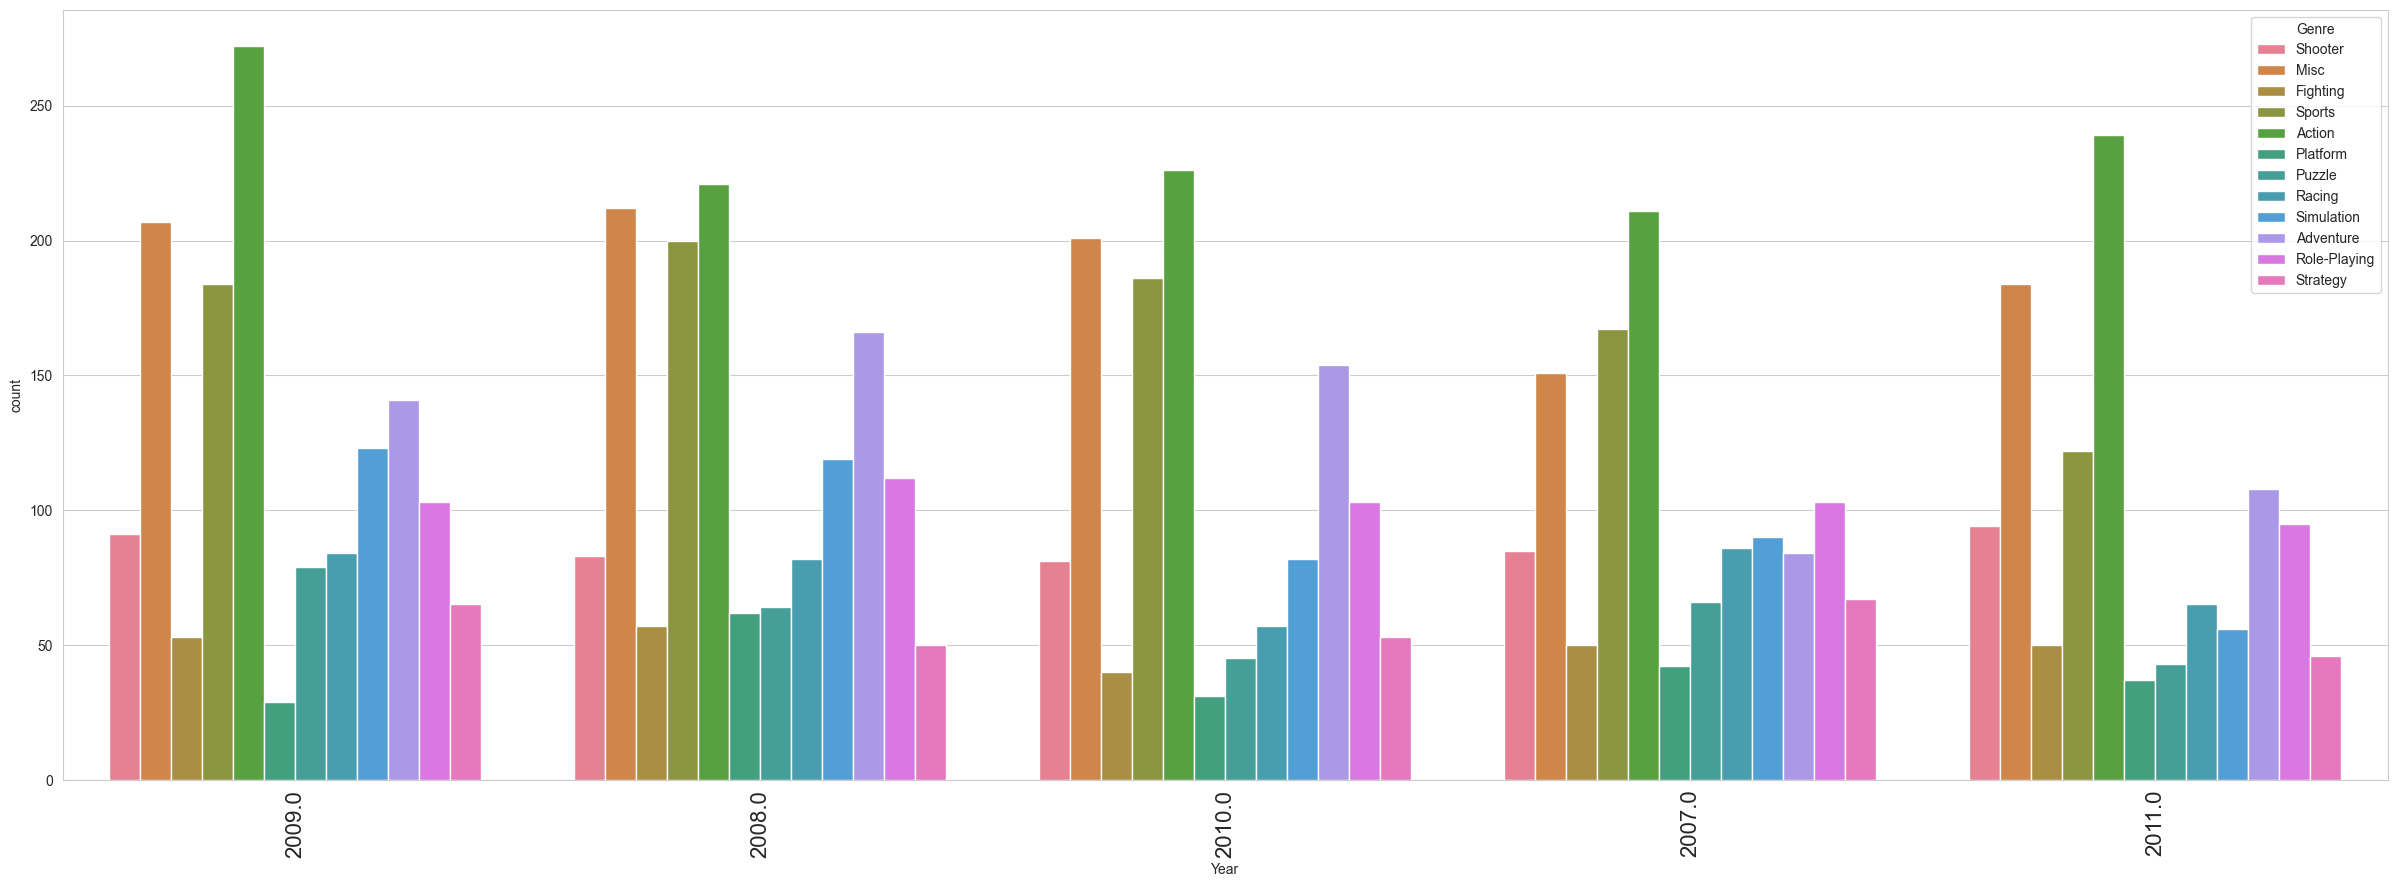

In [22]:
plt.figure(figsize=(30,10))
sns.countplot(x="Year",data=data,hue='Genre',order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16,rotation=90)

### 연도에 따라 가장 많이 출시 된 장르 및 수량

In [36]:
# 연도와 장르별로 데이터를 그룹화,각 조합의 개수를 세어 새로운 데이터프레임 생성
year_max_df = data.groupby(['Year','Genre']).size().reset_index(name="count")
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
# 연도와 개수로 중복된 값을 제거 (최신 장르 유지)
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=['Year','count'],keep='last').reset_index(drop=True)

# 2000~2016년 데이터 필터링
year_max_genre_filtered = year_max_genre[(year_max_genre['Year'] >= 2000)&(year_max_genre['Year'] <=2019)]

C:\Users\1호실-24\AppData\Local\Temp\ipykernel_3068\1897571833.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']


In [37]:
genre = year_max_genre['Genre'].values

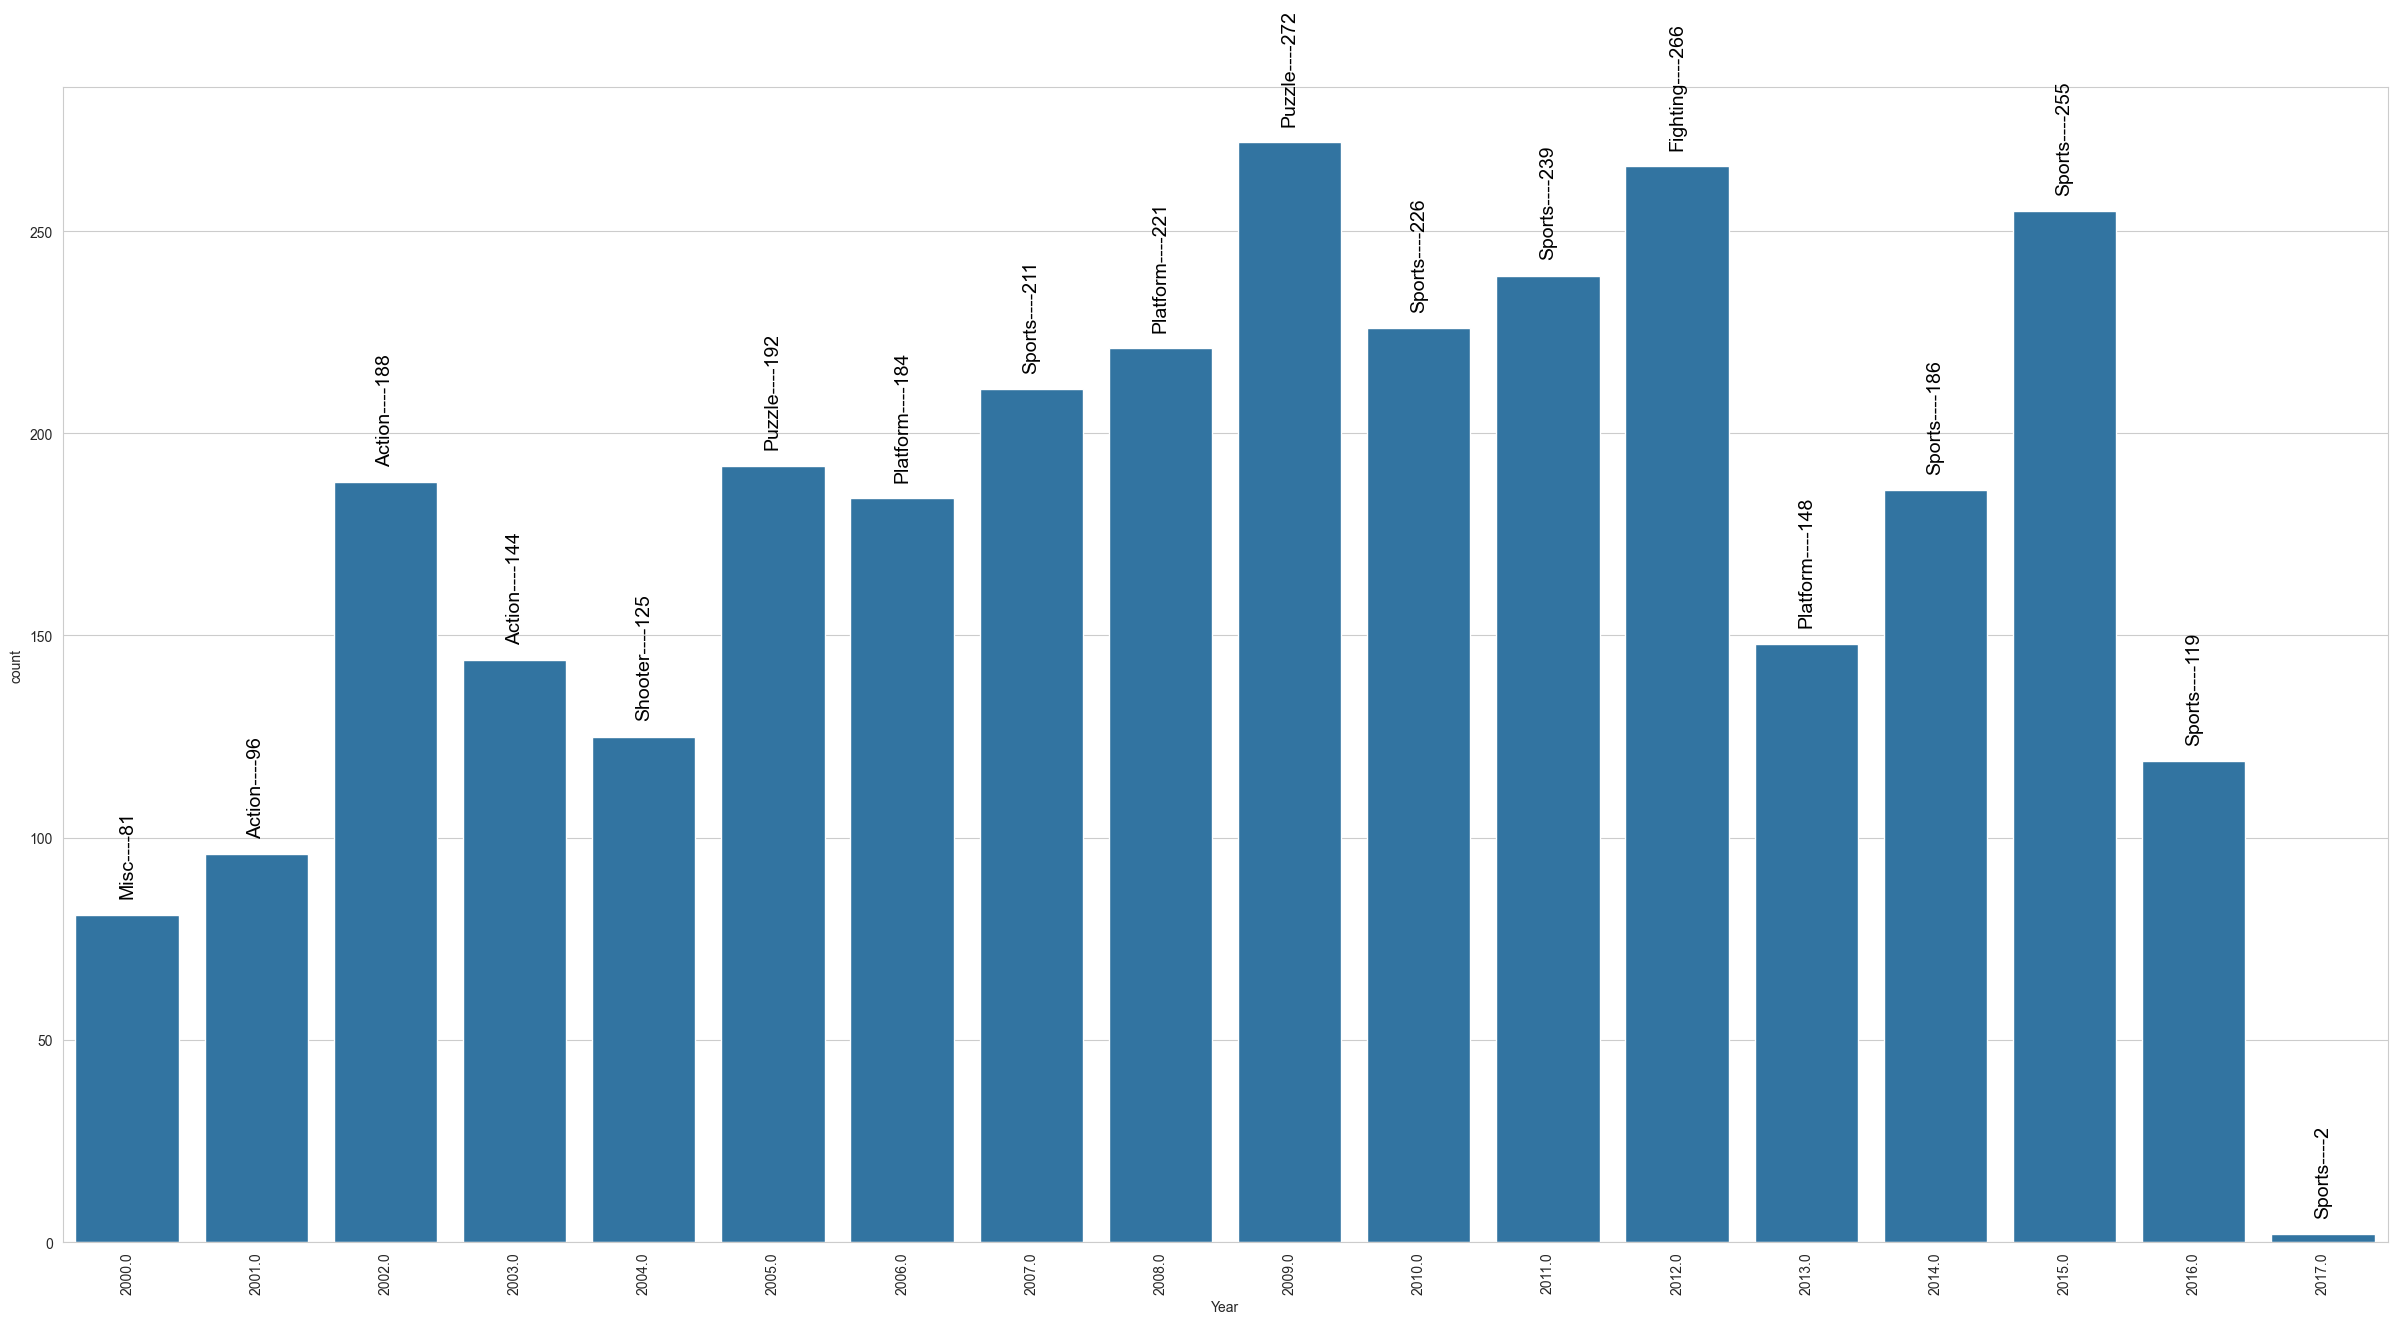

In [38]:
plt.figure(figsize=(30, 15))
#선 그래프 생성
g = sns.barplot(x='Year', y='count', data=year_max_genre_filtered)

# 그래프에 텍스트 추가
index = 0
for value in year_max_genre_filtered['count'].values:

    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1


#특정 연도 데이터만 출력
 


plt.xticks(rotation=90)
plt.show()

In [ ]:
# # 축의 값 포맷을 사용자 정의 형식으로 지정하기 위해서 사용하는 도구이다.
# from matplotlib.ticker import FuncFormatter

# # 데이터 불러오기
# genre_df = pd.read_csv("../00_data/vgsales.csv")

# # 막대 그래프
# # genre컬럼을 
# filtered_df = genre_df[(genre_df["InvoiceDate"] > "2010-12-01")& (genre_df["InvoiceDate"] < "2011-06-01")].copy()
